# LOADING PRETRAINED WEIGHTS FROM OPENAI

<div class="alert alert-block alert-success">
<b> What is this Notebook about</b>

We have built GPT and trained on very small dataset. We have seen that the model overfits and have High Variance.
Inorder to reduce this variance and overfitting , we have to train this model on huge corpus of data.

Ideally this data is huge with billions or billions Tokens . This will be costly afair for us to gather this data.
Moreover , training this Model on this corpus of data is time consumeing and costly matter . 

We need huge processing power with large GPUs and processing power.

Hence , we can do one thing as below

We can actually download the pre-trained GPT 2 (or for that matter ansy model) Weights that are avaliable and load our model using those weights.

What will happen is , our model cab use this weights (COmpany already spend money and manpower training this) and perform like a fully trained Models


We will see in this Notyebook how to load the pre-trained models weights
</div>

<div class="alert alert-block alert-success">
    
In the remainder of this section, we load these weights into our GPTModel class and use
the model for text generation. 

Here, weights refer to the weight parameters that are stored
in the .weight attributes of PyTorch's Linear and Embedding layers, for example. 

We accessed them earlier via model.parameters() when training the model.
</div>

<div class="alert alert-block alert-success">
    
Note that OpenAI originally saved the GPT-2 weights via TensorFlow, which we have to
install to load the weights in Python. 

Moreover, the following code will use a progress bar
tool called tqdm to track the download process, which we also have to install.
</div>

In [38]:
import tensorflow as tf
import tqdm
import torch
import torch.nn as nn
import numpy as np

print("TensorFlow version:", tf.__version__)
print("tqdm version:", tqdm.__version__)

TensorFlow version: 2.20.0
tqdm version: 4.67.1


<div class="alert alert-block alert-success">
<b> Model Weights Download and Loading</b>
    
The below 2 lines shown perform following operation:
1. Download the Model Metadata and Weights files (in total there are 6 files for 124M GPT-2 Model)
2. Once downloaded , it reads and load the weights and store in very specific format dictionary "params"

The Weights are stored in very specific format as shown in screen shot. For mofe details check below youtube

https://www.youtube.com/watch?v=yXrGeDNuymY&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=32

</div>

<div class="alert alert-block alert-success">
<b> Model Weights Download and Loading</b>
    
You can also debug this in Pycharm to see how the data is organized , read and loaded to params

https://www.youtube.com/watch?v=yXrGeDNuymY&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=32

</div>

In [5]:
from downloadModelWeights import download_and_load_gpt2

In [6]:
settings, params =  download_and_load_gpt2(model_size="124M", models_dir="gpt2")

File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [10]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


<div class="alert alert-block alert-success">
<b>Lets look at the format of this param Dictionary</b>

The Weights are written same as below Architecture
    
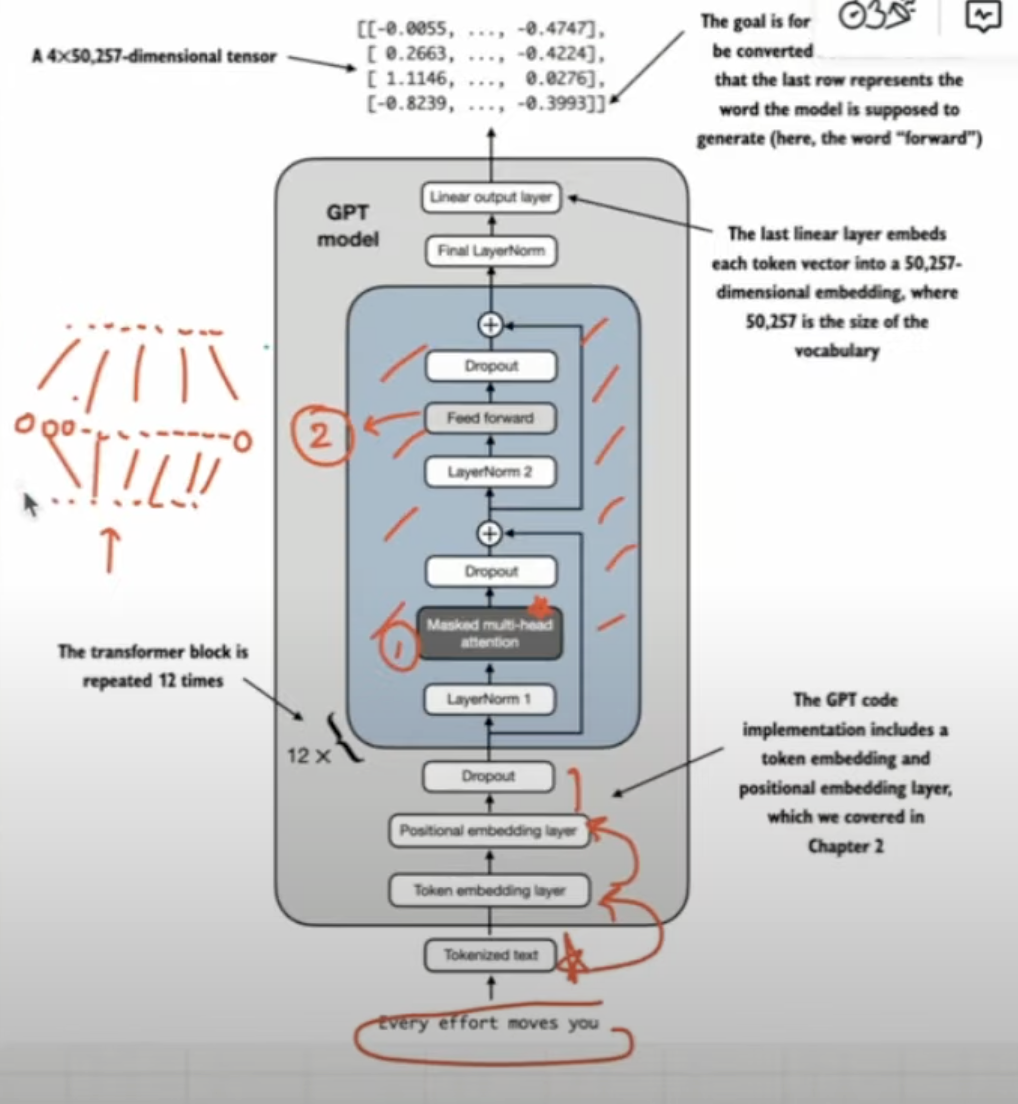

</div>

<div class="alert alert-block alert-success">
<b>12 Transformer block </b>
    


</div>

In [15]:

print(len(params["blocks"]))

12


<div class="alert alert-block alert-success">
<b>Each Transformer block contains </b>
    
1. Attention Block 
2. LayerNorm 1
3. LayerNomr 2
4. FeedForward Network


</div>

In [17]:
print(params["blocks"][0].keys())

dict_keys(['attn', 'ln_1', 'ln_2', 'mlp'])


<div class="alert alert-block alert-success">
<b>Each Attention Block </b>
    
1. Context matric
2. Out Projection Matrix


</div>

In [18]:
print(params["blocks"][0]["attn"].keys())

dict_keys(['c_attn', 'c_proj'])


<div class="alert alert-block alert-success">
<b>Each Attention and Outproject Block </b>
    
1. Weight Matrix values
2. Bias matric values


</div>

In [21]:
print("Context Vector:", params["blocks"][0]["attn"]["c_attn"].keys())
print("Out Projection Vector:" , params["blocks"][0]["attn"]["c_proj"].keys())

Context Vector: dict_keys(['b', 'w'])
Out Projection Vector: dict_keys(['b', 'w'])


<div class="alert alert-block alert-success">
<b>Other Paramters as below </b>
    
1. wpe :-  Position Embedding
2. wte :-  token Embedding
3. b   :- Final LayerNorm Shift
4. g"  :- Final LayerNorm Scale


</div>

In [24]:
print("Parameter dictionary keys:", params.keys())

Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [26]:
# As seen this matched the dimensions we learned during our course
# Vocal size :- 50257
# Embedding Size :- 768
# Context Size = 1024

print("Token embedding weight tensor dimensions:", params["wte"].shape)
print("Position embedding weight tensor dimensions:", params["wpe"].shape)

Token embedding weight tensor dimensions: (50257, 768)
Position embedding weight tensor dimensions: (1024, 768)


<div class="alert alert-block alert-success">
    
Above, we loaded the 124M GPT-2 model weights into Python, however we still need to transfer them into our GPTModel instance.

First, we initialize a new GPTModel instance.

Note that the original GPT model initialized the linear layers for the query, key, and value matrices in the multi-head attention module with bias vectors, which is not required or recommended; however, to be able to load the weights correctly, we have to enable these too by setting qkv_bias to True in our implementation, too.
                                                                                                                                                                                                                                                                                                                                  
We are also using the 1024 token context length that was used by the original GPT-2 model(s)


<div class="alert alert-block alert-success">
    
We downloaded and loaded the weights of the smallest GPT-2 model via the
download_and_load_gpt2(model_size="124M", ...) setting. However, note that OpenAI
also shares the weights of larger models: "355M", "774M", and "1558M".

</div>

In [29]:
# Lets define the confoguration for GPT Model
# We planning to build the GPT Model with 124M parameters. This is the small GPT version

GPT_CONFIG_124M = {
  "vocab_size"     : 50257, # BPE encoding has the vocab size of 50257
  "context_length" : 256,  # number of token we can look at ones to predict new word
  "emb_dim"        : 768,   # The Toekn Embedding dimension
  "n_heads"        : 12,    # number of attention heads
  "n_layers"       : 12,    # Number of layers (Transformer blocks)
  "drop_rate"      : 0.1,   # Dropout Rate
  "qkv_bias"       : False  # Quert-Key-Value Bias
}

In [39]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out ,context_length , dropout , num_heads , qkv_bias=False):
        super().__init__()
        assert(d_out % num_heads ==0) , f"d_out should be divisible by num_heads"

        self.d_out= d_out
        self.num_heads = num_heads
        self.head_dim= d_out // num_heads # check above for the explaination (10. Multi-head attention Part 2)
        
        # Here we have initialixed the Weight Matrices with larger dimensions already
        # This if to perform operations and then split to its respect heads based on value num_head
        # So in this example we decide d_out = 6 , hence with num_heads =2 , we will have 2 heads (causal attentions) with 3 dimension each
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        
        self.dropout= nn.Dropout(dropout)
        self.register_buffer("mask" ,
                             torch.triu(torch.ones(context_length , context_length),
                             diagonal=1))

    def forward(self,x):
        b,num_tokens,d_in = x.shape

        #print("Dimension of Weight Matrice before inputs operation" , self.W_value.weight.shape , "\n")
        # this gives us the 3 * 6 Weight matrices
        queries = self.W_key(x)
        keys    = self.W_query(x)
        values  = self.W_value(x)
        #print("Dimension of Weight Matrice after inputs operation:" , values.shape , "\n")
        #print("Values of Weight Matrice after inputs operation: \n" , values , "\n")

        # We implicitly split the matrix by adding a `num_heads` dimension
        # reshape the last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        # basically we just reshaping it per token , per head  (group by tokens)
        keys = keys.reshape(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.reshape(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.reshape(b, num_tokens, self.num_heads, self.head_dim)
        
        #print("Dimension of Weight Matrice after Reshape operation:" , values.shape, "\n") 
        #print("Values of Weight Matrice after Reshapr operation: \n" , values, "\n")

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        # This is required becuase we want to perform multiplication operation between data (token and dimesnion)
        # so we get the data that is tokens  and embedding at rthe end
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        #print("Dimension of Weight Matrice after Grouping by Head operation:" , values.shape, "\n") 
        #print("Values of Weight Matrice after Grouping by Head  operation: \n" , values, "\n")

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        # Now attn score dimension is (batch , head_num , tokens , head_dim)
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        #print("Dimension of Attention cores Matrice :" , attn_scores.shape, "\n") 
        #print("Values of Attention cores Matrice: \n" , attn_scores, "\n")

        
        # Original mask truncated to the number of tokens and converted to boolean
        # this is tghe edge case , if there are token less then context length (end of datasets)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        #print("Values of Masked Boolean Matrix: \n" , mask_bool, "\n")

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        #print("Values of Masked Attention cores Matrice: \n" , attn_scores, "\n")

        # Perform the normalization
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        # Perform the droput
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        #context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = context_vec.reshape(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [40]:
class LayerNorm(nn.Module):
    def __init__(self,emb_dim):
        super().__init__()
        self.eps=1e-5
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))


    def forward(self,x):
        mean = x.mean(dim=-1,keepdim=True)
        var = x.var(dim=-1 , keepdim=True , unbiased=False)
        norm_x = (x-mean) / torch.sqrt(var+self.eps)
        #print(norm_x)
        return self.scale * norm_x + self.shift

In [41]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self,x):
        activation = 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x,3))
        ))

        return activation

In [42]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), # Define 1st layer with input and o/p size . Expansion
            GELU(),                                        # Define the Activation function
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), # define the final layer . Contraction
        )

    def forward(self, x):
        return self.layers(x)

In [43]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)  # As seen in pic , this is LayerNorm1 (from bottom)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size] , This is Block 2
        x = self.drop_shortcut(x) # Then Dropout Block 3 (from bottom)
        x = x + shortcut  # Add the original input back (shortcut )

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x) 
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

In [44]:
import torch
import torch.nn as nn

class GPTModel(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"] , cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"] , cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = LayerNorm(cfg["emb_dim"])

        # this is the layer to convert the vector output to Logits vector 
        # of size batch * Context length * vocab_size
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size , seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx) # Embedd the tokesn to higher dimensional space
        pos_embeds = self.pos_emb(torch.arange(seq_len,device=in_idx.device)) # get Pos Embedding
        x=tok_embeds + pos_embeds # Combine the Token Embeds with its position embeds
        x=self.drop_emb(x)   # Perform Droput 
        x=self.trf_blocks(x)
        x= self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [46]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

if torch.cuda.is_available():
   device = torch.device("cuda")
elif torch.backends.mps.is_available():
   device = torch.device("mps")
else:
   device = torch.device("cpu")

print(f"Using {device} device.")

# The data and the Model has to be on the same devicer. Or else it will throw runtime 
# Exception . You can try this by changing below to
# model.to("cpu") 

#model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes

Using mps device.


In [37]:
# Define model configurations in a dictionary for compactness
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()

print(NEW_CONFIG)
print(model_configs[model_name])

NEW_CONFIG.update(model_configs[model_name])
print(NEW_CONFIG)

{'vocab_size': 50257, 'context_length': 256, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': False}
{'emb_dim': 768, 'n_layers': 12, 'n_heads': 12}
{'vocab_size': 50257, 'context_length': 256, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': False}
